# AirBNB Price Predictor

In [491]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [492]:
#read in listing csvs
boston_listings = pd.read_csv("BostonData/listings.csv")
seattle_listings = pd.read_csv("SeattleData/listings.csv")


In [493]:
#conactenate the dataframes
combined_listings = pd.concat([boston_listings,seattle_listings], axis = 0 , join = "inner" )

In [494]:
combined_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [495]:
#look at the column names and git rid of ones that we cant use
combined_listings.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

# Getting rid of useless data

In [496]:
dropped_combined_listings = combined_listings.drop(columns = ["id","listing_url","scrape_id",'name', 'summary',
       'space', 'description','experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name','host_about','host_thumbnail_url', 'host_picture_url','neighbourhood', 'neighbourhood_group_cleansed',
       'zipcode', 'market',"smart_location",'country_code', 'country',"calendar_updated",'calendar_last_scraped', 'first_review', 'last_review',"license",'jurisdiction_names', 'is_location_exact','weekly_price',"monthly_price","security_deposit",'last_scraped','host_since','street','neighbourhood_cleansed','instant_bookable','require_guest_profile_picture','require_guest_profile_picture','requires_license','host_verifications','host_identity_verified','host_has_profile_pic','host_total_listings_count',	'host_location','require_guest_phone_verification','cancellation_policy','extra_people','cleaning_fee','amenities',"guests_included",'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license','host_is_superhost','reviews_per_month','has_availability','accommodates','host_listings_count','calculated_host_listings_count'])

In [497]:
dropped_combined_listings.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'city', 'state', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_feet', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365'],
      dtype='object')

In [498]:
#check to see if columns have NA values
def portion_of_na(column):
    non_na = column.count()
    number_na = len(column) - non_na 
    return number_na / len(column)


#create lambda function that drops columns if they have over half n/a values

thresh = lambda col :  dropped_combined_listings.drop(columns = [col.name] , inplace= True, axis = 1) if portion_of_na(col) > 0.5 else None
#try to catch index error
try:
    dropped_combined_listings.apply(func = thresh, axis = 0)
except IndexError:
    pass
#dropped_combined_listings.shape

In [499]:
dropped_combined_listings.shape
#three rows are dropped

(7403, 21)

In [500]:
#drop any rows where we dont have a price
dropped_combined_listings = dropped_combined_listings.dropna(subset = ['price'], axis = 0)
#remove dollar signs and commas from price
dropped_combined_listings.price = dropped_combined_listings.price.replace({"\$":'',",":''},regex= True)
#convert prices from object to float type
dropped_combined_listings.price = dropped_combined_listings.price.astype('float')

# Impute values in numerical columns using the mean

In [501]:
#divide the values into numerical and categorical columns
numerical_cols = dropped_combined_listings.select_dtypes(exclude="object")
categorical_cols = dropped_combined_listings.select_dtypes(include="object")

#impute mean numerical values for the numerical column

imputer =  lambda col : col.fillna(col.mean())
numerical_cols.apply(imputer)


,latitude,longitude,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365
0,42.282619,-71.133068,1.5,2.0,3.0,250.0,2,1125,0,0,0,0
1,42.286241,-71.134374,1.0,1.0,1.0,65.0,2,15,26,54,84,359
2,42.292438,-71.135765,1.0,1.0,1.0,65.0,3,45,19,46,61,319
3,42.281106,-71.121021,1.0,1.0,2.0,75.0,1,1125,6,16,26,98
4,42.284512,-71.136258,1.5,1.0,2.0,79.0,2,31,13,34,59,334
...,...,...,...,...,...,...,...,...,...,...,...,...
3813,47.664295,-122.359170,2.0,3.0,3.0,359.0,3,1125,18,32,32,32
3814,47.649552,-122.318309,1.0,1.0,2.0,79.0,2,29,6,26,44,273
3815,47.508453,-122.240607,1.0,1.0,1.0,93.0,1,7,29,59,88,88
3816,47.632335,-122.275530,1.0,0.0,1.0,99.0,3,1125,30,60,90,179


# Correlation of numerical features

<AxesSubplot:>

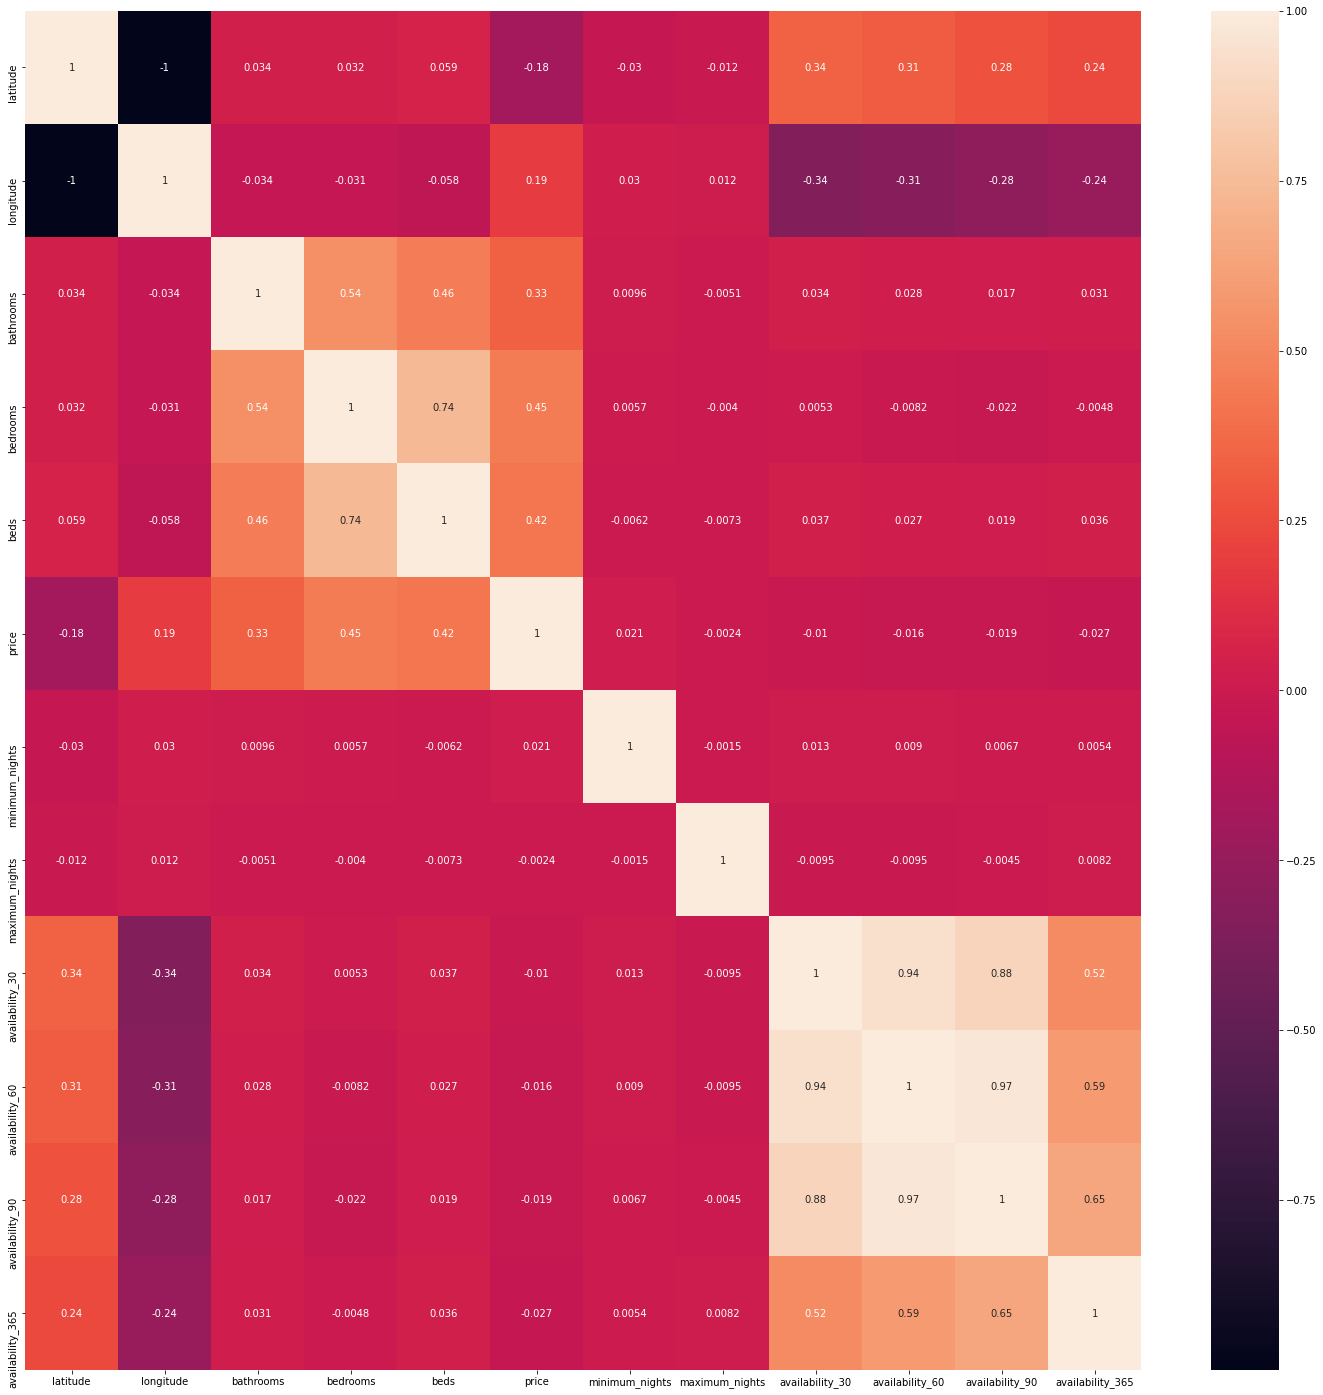

In [502]:
#look at correlation matrix to see which values correleate the most with price
corrmatrix = numerical_cols.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corrmatrix,annot=True,ax= ax)

# One hot encode categorical variables

In [503]:
categorical_cols = pd.get_dummies(categorical_cols,dummy_na=False)


In [504]:
categorical_cols

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0%,host_response_rate_10%,host_response_rate_100%,host_response_rate_14%,host_response_rate_17%,host_response_rate_19%,...,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3814,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3815,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3816,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Prep for training

In [505]:
#seperate y
combined = pd.concat([numerical_cols,categorical_cols], axis = 1)
combined.dropna(inplace=True)
y = combined.price
#combine numerical and categorical colums
X = combined.drop(columns = ['price'], axis = 1)
X.head()

,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,42.282619,-71.133068,1.5,2.0,3.0,2,1125,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,42.286241,-71.134374,1.0,1.0,1.0,2,15,26,54,84,...,0,0,0,1,0,0,0,0,0,1
2,42.292438,-71.135765,1.0,1.0,1.0,3,45,19,46,61,...,0,0,0,1,0,0,0,0,0,1
3,42.281106,-71.121021,1.0,1.0,2.0,1,1125,6,16,26,...,0,0,0,1,0,0,0,0,0,1
4,42.284512,-71.136258,1.5,1.0,2.0,2,31,13,34,59,...,0,0,0,1,0,0,0,0,0,1


In [506]:
#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.1 )


In [507]:
#implement xgboost model
model = RandomForestRegressor()

In [508]:
#fit the model to our training data
model.fit(X_train,y_train)



RandomForestRegressor()

In [509]:
prediction = model.predict(X_test)

In [510]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test,prediction)

In [511]:
error

37.23512228260869

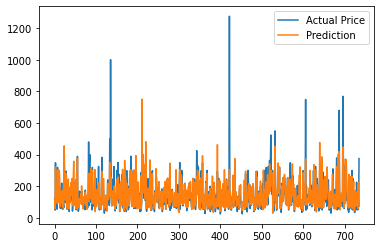

In [514]:
y_test = y_test.reset_index(drop=True)
plot = sns.lineplot(x = y_test.index ,y = y_test.values)
predictions = pd.Series(prediction)
plot = sns.lineplot(x = predictions.index, y = predictions.values)
plt.legend(["Actual Price", ])

# Take a look at feauture importances , what are the greatest price predictors?

In [518]:
#create a dict with correspondiong feature names and weights
names = []
for i in range(len(model.feature_importances_)):
    names.append((X.columns[i],model.feature_importances_[i]))

#sort the list based on feature importance
names.sort(key = lambda x : x[1],reverse=True)
#lets see the 10 most important features
names[:10]

[('bedrooms', 0.22055465955719294),
 ('longitude', 0.20145538662800824),
 ('latitude', 0.09537131667472405),
 ('bathrooms', 0.06982587503800584),
 ('availability_365', 0.05962101981268953),
 ('room_type_Entire home/apt', 0.04917050427538808),
 ('availability_90', 0.03825772297560956),
 ('minimum_nights', 0.03352228523738831),
 ('beds', 0.028090937832729403),
 ('availability_60', 0.02596914031118063)]

# Conclusion
By looking at our correlation matrix, as well as the feature importance of each feature, it seems that the main determining factors in the price of an AirBNB are number of bedrooms, location, and number of bathrooms. This goes hand in hand with conventional real estate wisdom (think "location location location"). It is important to note that the model was not too accurate, having a mean error of 37$, which is not great. This could be due to having too many feature, or perhaps lacking information, like ameneties